In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.animation as animation
import pandas as pd
import os
import numpy as np
import math
from math import cos, sin, tanh
import helper
from scipy.signal import savgol_filter
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [28]:
# %matplotlib notebook

## Getting started (this part can be ignored)

                  timestamp         x         z
0   1900-01-01 03:24:16.440  3.221096  1.298159
1   1900-01-01 03:24:16.540  3.221096  1.298159
2   1900-01-01 03:24:16.650  3.221096  1.298159
3   1900-01-01 03:24:16.750  3.221096  1.298159
4   1900-01-01 03:24:16.820  3.221096  1.298159
..                      ...       ...       ...
167 1900-01-01 03:24:33.140 -0.273038  5.099765
168 1900-01-01 03:24:33.250 -0.273804  5.099710
169 1900-01-01 03:24:33.350 -0.272615  5.100973
170 1900-01-01 03:24:33.420 -0.272569  5.101015
171 1900-01-01 03:24:33.520 -0.273849  5.101318

[172 rows x 3 columns]
                  timestamp         x         z
0   1900-01-01 03:24:16.440  3.839770  5.189748
1   1900-01-01 03:24:16.540  3.840061  5.189307
2   1900-01-01 03:24:16.650  3.840297  5.190523
3   1900-01-01 03:24:16.750  3.843216  5.192607
4   1900-01-01 03:24:16.820  3.845982  5.193388
..                      ...       ...       ...
167 1900-01-01 03:24:33.140 -0.897656  1.424884
168 1900-01-01 0

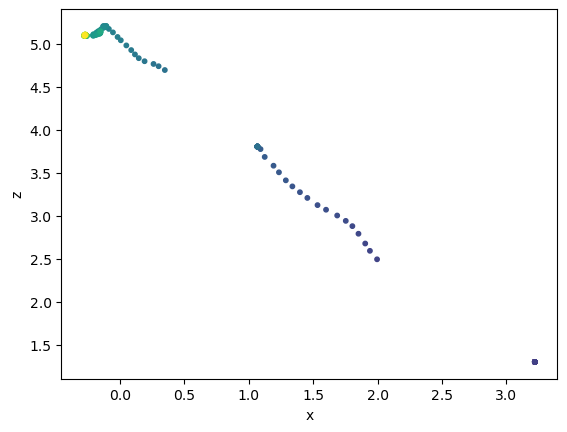

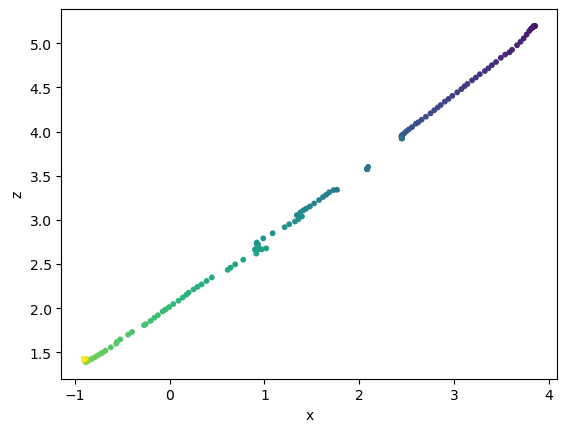

In [2]:
# Drawing a single trajectory 
# --- Insert ---
pp_id = '21'
trial = '32'
# --------------

path_Human = './newdata/id_' + pp_id + '/Human'
path_Spot = './newdata/id_' + pp_id + '/Spot'

df_Human = pd.read_csv(path_Human + "/" + pp_id + "_"+ trial + ".txt", sep=" ", header=None, 
                 names=["timestamp", "x", "z"])
df_Spot = pd.read_csv(path_Spot +  "/" + pp_id + "_"+ trial + ".txt", sep=" ", header=None, 
                 names=["timestamp", "x", "z"])

df_Human['timestamp'] = pd.to_datetime(df_Human['timestamp'], format = '%H:%M:%S:%f')
df_Spot['timestamp'] = pd.to_datetime(df_Spot['timestamp'], format = '%H:%M:%S:%f')

# display DataFrame
print(df_Human)
print(df_Spot)

df_Human.plot.scatter(x = 'x', y = 'z', c = 'timestamp', s = 10);
df_Spot.plot.scatter(x = 'x', y = 'z', c = 'timestamp', s = 10);

In [3]:
## Separate dominant and submissive, then put it in a dataframe

#--- Insert here ---
pp_id = '01'
position_of = 'Spot'
scenario = 'fronting' # fronting or crossing
apparance = 'dom' # 'dom' or 'sub' 
#-------------------

trial_list = helper.get_trial_list(scenario, apparance)
df_list = []

# load data files, put it in a list
for i in range(8): # change later to the length of the list
    filepath = './newdata/id_' + pp_id + '/' + position_of + '/' + pp_id + '_' + str(trial_list[int(pp_id)][i]) + '.txt'
    df = pd.read_csv(filepath, sep=" ", header=None, names=["timestamp", "x", "z"])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%H:%M:%S:%f')
    df_list.append(df)

# Concatenate the df in the list horizontally
df = pd.concat(df_list, axis=1, ignore_index=False)

df
# Draw four lines in one plot 
#(Probably need to normalize the time to draw multiple trajectories in one plot)

,timestamp,x,z,timestamp,x,z,timestamp,x,z,timestamp,...,z,timestamp,x,z,timestamp,x,z,timestamp,x,z
0,1900-01-01 03:08:06.400,2.302944,5.933489,1900-01-01 03:08:27.620,-1.236823,1.169237,1900-01-01 03:10:56.420,-1.119105,1.312351,1900-01-01 03:11:45.000,...,5.964508,1900-01-01 03:12:31.320,-1.150076,1.314698,1900-01-01 03:12:53.220,2.410275,5.959477,1900-01-01 03:13:36.800,2.502175,6.042627
1,1900-01-01 03:08:06.520,2.293928,5.909678,1900-01-01 03:08:27.720,-1.234572,1.169780,1900-01-01 03:10:56.500,-1.118937,1.312778,1900-01-01 03:11:45.100,...,5.964537,1900-01-01 03:12:31.420,-1.149325,1.317957,1900-01-01 03:12:53.300,2.410240,5.959622,1900-01-01 03:13:36.900,2.502064,6.042599
2,1900-01-01 03:08:06.610,2.284491,5.870634,1900-01-01 03:08:27.830,-1.232159,1.182333,1900-01-01 03:10:56.600,-1.115981,1.325414,1900-01-01 03:11:45.200,...,5.963884,1900-01-01 03:12:31.530,-1.144150,1.336301,1900-01-01 03:12:53.400,2.411297,5.961002,1900-01-01 03:13:37.020,2.499049,6.037822
3,1900-01-01 03:08:06.720,2.271422,5.838198,1900-01-01 03:08:27.900,-1.228101,1.199047,1900-01-01 03:10:56.700,-1.101699,1.348948,1900-01-01 03:11:45.310,...,5.966101,1900-01-01 03:12:31.630,-1.127569,1.362504,1900-01-01 03:12:53.510,2.414044,5.965832,1900-01-01 03:13:37.120,2.492511,6.017727
4,1900-01-01 03:08:06.830,2.256602,5.809275,1900-01-01 03:08:28.010,-1.209619,1.230172,1900-01-01 03:10:56.810,-1.082846,1.385844,1900-01-01 03:11:45.420,...,5.969727,1900-01-01 03:12:31.710,-1.111503,1.389935,1900-01-01 03:12:53.610,2.415642,5.969256,1900-01-01 03:13:37.220,2.480292,5.984984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,NaT,NaN,NaN,NaT,NaN,NaN,1900-01-01 03:11:20.500,2.468749,6.060694,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
242,NaT,NaN,NaN,NaT,NaN,NaN,1900-01-01 03:11:20.610,2.467185,6.062006,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
243,NaT,NaN,NaN,NaT,NaN,NaN,1900-01-01 03:11:20.720,2.466573,6.062155,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN
244,NaT,NaN,NaN,NaT,NaN,NaN,1900-01-01 03:11:20.820,2.466681,6.062024,NaT,...,NaN,NaT,NaN,NaN,NaT,NaN,NaN,NaT,NaN,NaN


# Distance between Spot and Human

## Raw distance plots

In [4]:
# Calculate distance between the objects over time (fronting scenario)

def get_df_distance(pp_ids, apparance):
    
    df_plot= None

    for pp_id in pp_ids:
        path_Human = './newdata/id_' + pp_id + '/Human'
        path_Spot = './newdata/id_' + pp_id + '/Spot'

        trials = helper.get_trial_list('fronting', apparance)

        for i in trials[int(pp_id)-1]:
            df_Human = pd.read_csv(path_Human + "/" + pp_id + "_"+ str(i) + ".txt", sep=" ", header=None, 
                             names=["ts", "x_human", "z_human"])
            df_Spot = pd.read_csv(path_Spot +  "/" + pp_id + "_"+ str(i) + ".txt", sep=" ", header=None, 
                             names=["ts", "x_spot", "z_spot"])

            # Check if the length of the dataframe matchs
            if not df_Human.size == df_Spot.size: 
                # print("Warning: Time stamp does not match!!!")
                break 

            # Concatenate to one dataframe for plotting
            df = pd.concat([df_Human, df_Spot], axis=1)
            df['time'] = np.arange(df.shape[0])/10
            # print("--- ", i )

            # Calculate distance between two objects and append to list
            df['distance'] = np.sqrt((df['x_human']-df['x_spot'])**2 + (df['z_human']-df['z_spot'])**2)
            
            # Add some columns that can be useful later 
            df['trial'] = i
            df['pp_id'] = int(pp_id)

            df_plot = pd.concat([df_plot, df.loc[:200, 'time':]], axis = 0)
            # print(df_plot)
            
            sns.lineplot(df.loc[:200, 'distance'], legend= "full")
            
    return df_plot

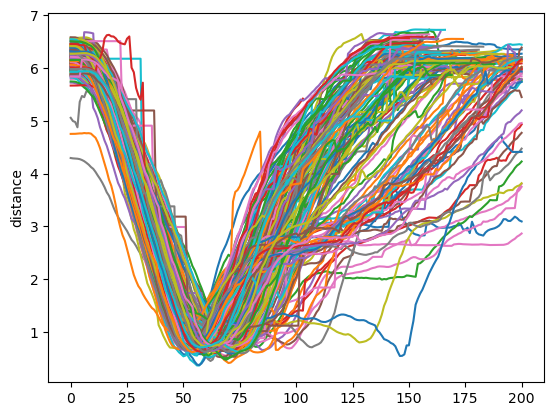

In [5]:
df_dis_dom = get_df_distance(pp_ids= ["%02d" % x for x in range(1, 22)], apparance = 'dom')
df_dis_dom["Appearance"] = "Dominant"

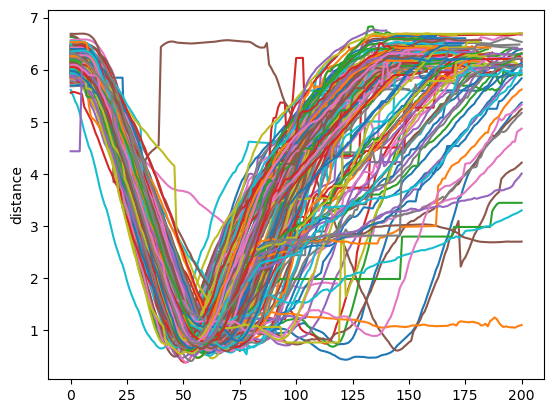

In [6]:
df_dis_sub = get_df_distance(pp_ids= ["%02d" % x for x in range(1, 22)], apparance = 'sub')
df_dis_sub["Appearance"] = "Submissive"

# Some further processing of the distance dynamics data

Put all the distance data generated above to a single dataframe for easier plotting

In [7]:
distance_dynamics = pd.concat([df_dis_sub, df_dis_dom])

Now let's smooth the data to get nicer trajectories and more reliable minimum distances

In [8]:
apply_filter = lambda traj: savgol_filter(traj, window_length=21, polyorder=2, axis=0)
groupby_cols = ["pp_id", "trial"]
cols_to_smooth = ["distance"]
distance_dynamics.loc[:, "distance_s"] = (distance_dynamics.loc[:, groupby_cols + cols_to_smooth].groupby(groupby_cols).transform(apply_filter))

In [9]:
distance_dynamics

,time,distance,trial,pp_id,Appearance,distance_s
0,0.0,6.344672,2,1,Submissive,6.349832
1,0.1,6.320642,2,1,Submissive,6.326750
2,0.2,6.283391,2,1,Submissive,6.296800
3,0.3,6.248953,2,1,Submissive,6.259983
4,0.4,6.213757,2,1,Submissive,6.216298
...,...,...,...,...,...,...
160,16.0,6.295075,15,21,Dominant,6.290577
161,16.1,6.295075,15,21,Dominant,6.309453
162,16.2,6.295075,15,21,Dominant,6.326280
163,16.3,6.295075,15,21,Dominant,6.341059


In [10]:
traj = distance_dynamics[(distance_dynamics.pp_id==1) & (distance_dynamics.trial==2)]

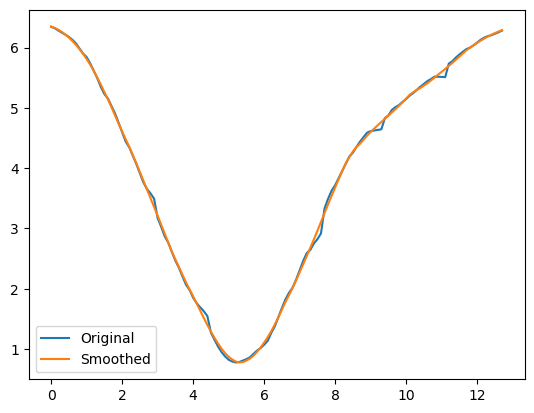

In [11]:
plt.plot(traj.time, traj.distance, label="Original")
plt.plot(traj.time, traj.distance_s, label="Smoothed")
plt.legend()

# Difference in distances to the robot between dominant and submissive robot

<Axes: xlabel='time', ylabel='distance_s'>

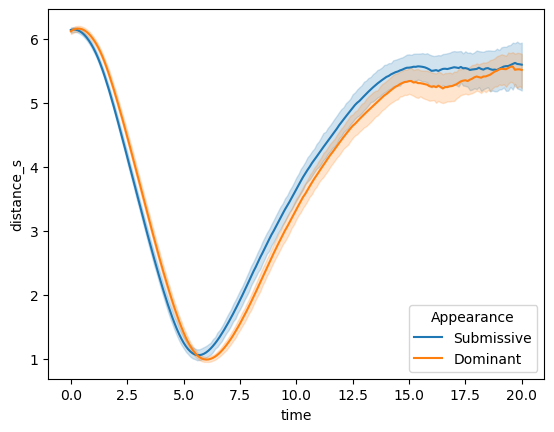

In [12]:
sns.lineplot(data = distance_dynamics, x='time', y='distance_s', hue="Appearance")

Just in case, compare to the original trajectories

<Axes: xlabel='time', ylabel='distance'>

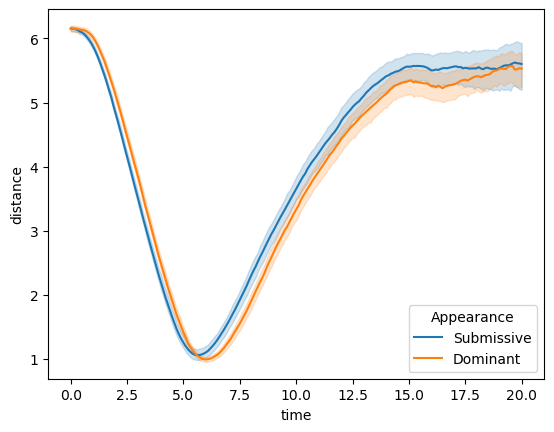

In [13]:
sns.lineplot(data = distance_dynamics, x='time', y='distance', hue="Appearance")

# Differences in trials over time

### For both appearances

<Axes: xlabel='time', ylabel='distance_s'>

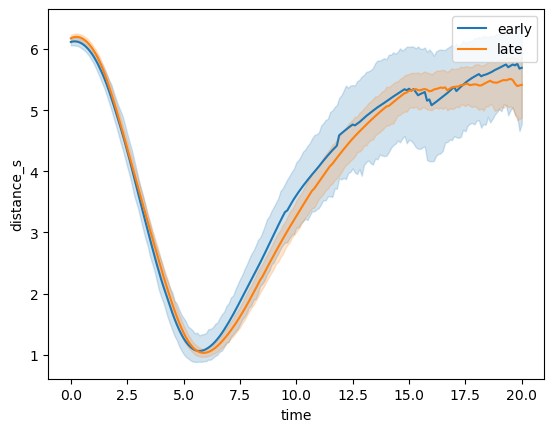

In [14]:
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([1, 17]))], 
             x="time", y="distance_s", label="early")
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([13, 14, 15, 16, 29, 30, 31, 32]))], 
             x="time", y="distance_s", label="late")

### For submissive

<Axes: xlabel='time', ylabel='distance_s'>

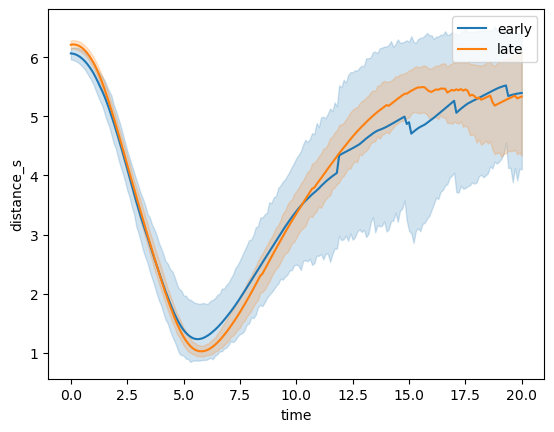

In [15]:
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([1, 17])) & (distance_dynamics["Appearance"]=="Submissive")], 
             x="time", y="distance_s", label="early")
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([13, 14, 15, 16, 29, 30, 31, 32]))& (distance_dynamics["Appearance"]=="Submissive")], 
             x="time", y="distance_s", label="late")

### For dominant

<Axes: xlabel='time', ylabel='distance_s'>

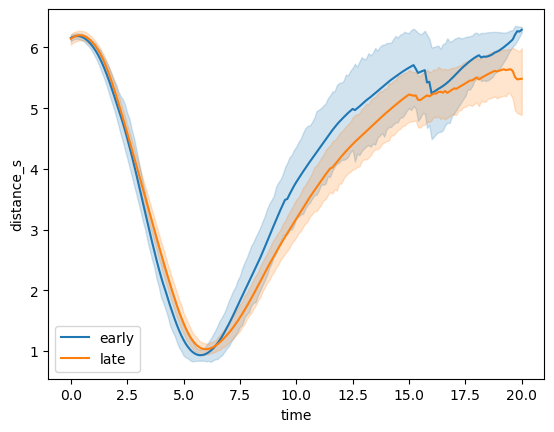

In [16]:
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([1, 17])) & (distance_dynamics["Appearance"]=="Dominant")], 
             x="time", y="distance_s", label="early")
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([13, 14, 15, 16, 29, 30, 31, 32]))& (distance_dynamics["Appearance"]=="Dominant")], 
             x="time", y="distance_s", label="late")

# Getting metrics for each trajectory

In [17]:
def get_min_distance(traj):
    idx_min = traj.distance_s.idxmin()
    return pd.Series({"idx_min": idx_min,
                      "t_min": traj.iloc[idx_min].time, 
                      "d_min": traj.iloc[idx_min].distance_s}) 

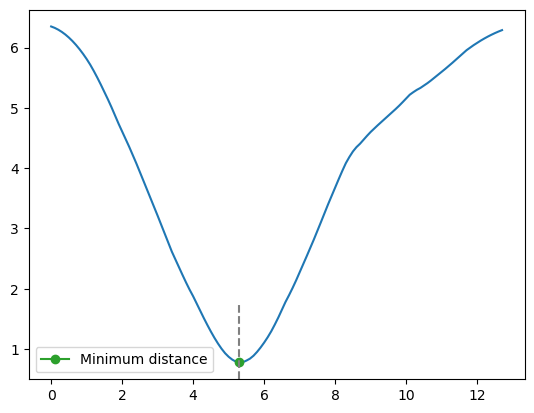

In [18]:
traj = distance_dynamics[(distance_dynamics.pp_id==1) & (distance_dynamics.trial==2)]
fig, ax = plt.subplots(1)
ax.plot(traj.time, traj.distance_s)
traj_measures = get_min_distance(traj)
ax.plot(traj_measures.t_min, traj_measures.d_min, label="Minimum distance", color="C2", marker="o")
ax.axvline(traj_measures.t_min, ymin=0, ymax=0.2, color="grey", ls="--")
plt.legend()

In [19]:
distance_metrics = (distance_dynamics.groupby(["pp_id", "trial"])
                    .apply(get_min_distance)
                    .join(distance_dynamics.groupby(["pp_id", "trial"]).first()["Appearance"])
                    .reset_index())

In [20]:
distance_metrics

,pp_id,trial,idx_min,t_min,d_min,Appearance
0,1,1,51.0,5.1,0.608186,Dominant
1,1,2,53.0,5.3,0.778055,Submissive
2,1,3,53.0,5.3,0.704137,Submissive
3,1,4,61.0,6.1,0.930015,Dominant
4,1,5,57.0,5.7,0.745893,Submissive
...,...,...,...,...,...,...
322,21,12,60.0,6.0,0.631903,Dominant
323,21,13,56.0,5.6,0.769273,Submissive
324,21,14,62.0,6.2,0.710637,Dominant
325,21,15,59.0,5.9,0.699368,Dominant


# Analyzing distance metrics

## Time of resolving the conflict

Let's look at the average time of resolving the conflict (e.g. time at which distance between the human and the spot was minimal)

In [21]:
distance_metrics[distance_metrics.Appearance=="Dominant"].t_min.mean(), distance_metrics[distance_metrics.Appearance=="Submissive"].t_min.mean()

(6.490566037735849, 6.255952380952381)

It seems that in interactions with the submissive robot, participants were slightly faster reaching it (difference of 230ms)

<Axes: xlabel='Appearance', ylabel='t_min'>

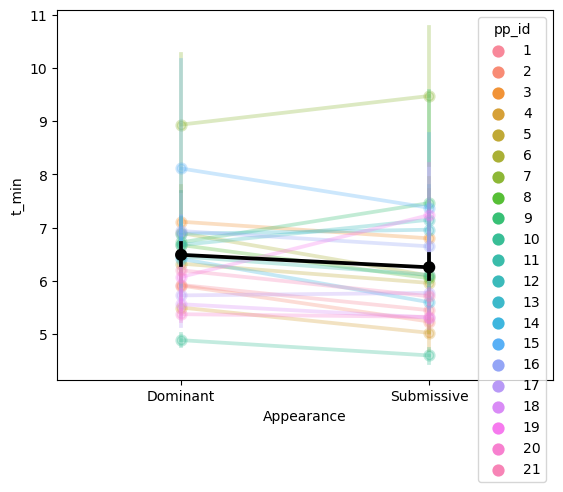

In [22]:
ax = sns.pointplot(data=distance_metrics, x="Appearance", y="t_min", hue="pp_id")
plt.setp(ax.collections, alpha=.3, zorder=1) #for the markers
plt.setp(ax.lines, alpha=.3, zorder=1)
sns.pointplot(data=distance_metrics, x="Appearance", y="t_min", color="black", ax=ax)

But what if we take into account the individual differences in baseline t_min/speed?
 - Mixed-effects model estimates the difference to be smaller (184ms difference between dominant and submissive)
  - It is not statistically significant (p=0.14)

In [23]:
mdf_t = smf.mixedlm("t_min ~ Appearance", distance_metrics.reset_index(), groups=distance_metrics.reset_index()["pp_id"]).fit()
print(mdf_t.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     t_min    
No. Observations:     327         Method:                 REML     
No. Groups:           21          Scale:                  1.2560   
Min. group size:      9           Log-Likelihood:         -528.1515
Max. group size:      16          Converged:              Yes      
Mean group size:      15.6                                         
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 6.439    0.225 28.596 0.000  5.998  6.881
Appearance[T.Submissive] -0.184    0.125 -1.469 0.142 -0.428  0.061
Group Var                 0.894    0.285                           


## Safety margin

The safety margins adopted by participants appear very similar (73-74cm)

In [24]:
distance_metrics[distance_metrics.Appearance=="Dominant"].d_min.mean(), distance_metrics[distance_metrics.Appearance=="Submissive"].d_min.mean()

(0.7406215327107741, 0.7346270749264818)

<Axes: xlabel='Appearance', ylabel='d_min'>

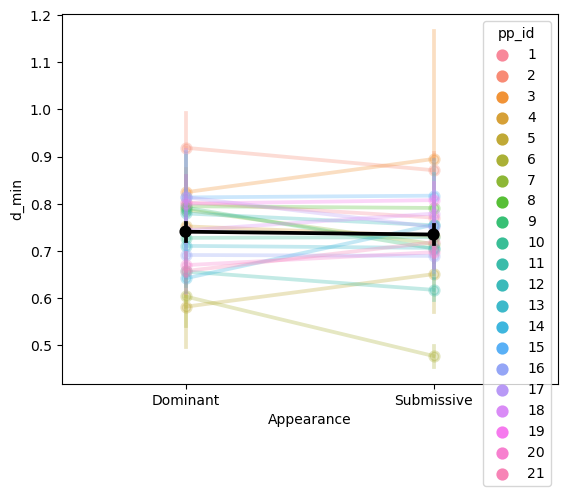

In [25]:
ax = sns.pointplot(data=distance_metrics, x="Appearance", y="d_min", hue="pp_id")
plt.setp(ax.collections, alpha=.3, zorder=1) #for the markers
plt.setp(ax.lines, alpha=.3, zorder=1)
sns.pointplot(data=distance_metrics, x="Appearance", y="d_min", color="black", ax=ax)

Here too, there is no evidence for a significant difference between dominant and submissive Spot

In [26]:
mdf_d = smf.mixedlm("d_min ~ Appearance", distance_metrics.reset_index(), groups=distance_metrics.reset_index()["pp_id"]).fit()
print(mdf_d.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     d_min   
No. Observations:      327         Method:                 REML    
No. Groups:            21          Scale:                  0.0114  
Min. group size:       9           Log-Likelihood:         238.4162
Max. group size:       16          Converged:              Yes     
Mean group size:       15.6                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.741    0.019 39.176 0.000  0.704  0.778
Appearance[T.Submissive] -0.006    0.012 -0.502 0.615 -0.029  0.017
Group Var                 0.006    0.020                           


C:\Users\nanap\anaconda3\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Crossing scenario

In [2]:
def get_crossing_df(pp_ids):
    
    df_plot= None
    appearances = ['sub', 'dom']
    
    for appearance in appearances:
        trials = helper.get_trial_list('crossing', appearance)

        for pp_id in pp_ids:
            path_Human = './traj_data/id_' + pp_id + '/Human'
            path_Spot = './traj_data/id_' + pp_id + '/Spot'

            for i in trials[int(pp_id)-1]:
                df_Human = pd.read_csv(path_Human + "/" + pp_id + "_"+ str(i) + ".csv", header = 0, names=["x_human", "z_human", "time"])
                df_Spot = pd.read_csv(path_Spot +  "/" + pp_id + "_"+ str(i) + ".csv", header = 0, names=["x_spot", "z_spot", "time"])
                
                # Check if the length of the dataframe matchs
                if not df_Human.size == df_Spot.size: 
                    print("Warning: Time stamp does not match!!!")
                    break 

                # Concatenate to one dataframe
                df = pd.concat([df_Human.loc[:, :"z_human"], df_Spot], axis=1)
                # print("--- ", pp_id, i , " ---")
                
                # print(df)
                
                # Calculate distance between two objects and append to list
                #df['distance'] = np.sqrt((df['x_human']-df['x_spot'])**2 + (df['z_human']-df['z_spot'])**2)

                # Add some columns that can be useful later 
                df['trial'] = i
                df['pp_id'] = int(pp_id)
                df['appearance'] = appearance

                df_plot = pd.concat([df_plot, df], axis = 0)
    
    return df_plot

In [75]:
df_crossing = get_crossing_df(pp_ids= ["%02d" % x for x in range(1, 22)])

In [4]:
df_crossing

,x_human,z_human,x_spot,z_spot,time,trial,pp_id,appearance
0,3.076976,2.942762,0.565110,0.251261,0.0,17,1,sub
1,3.082519,2.939923,0.565004,0.251831,0.1,17,1,sub
2,3.087497,2.937073,0.565523,0.251313,0.2,17,1,sub
3,3.092433,2.933979,0.577094,0.255493,0.3,17,1,sub
4,3.095552,2.931347,0.599582,0.261267,0.4,17,1,sub
...,...,...,...,...,...,...,...,...
167,3.345903,-2.695228,5.572216,-0.289826,16.7,32,21,dom
168,3.346524,-2.695680,5.572162,-0.289879,16.8,32,21,dom
169,3.344801,-2.695878,5.572354,-0.290144,16.9,32,21,dom
170,3.344738,-2.695881,5.571944,-0.289819,17.0,32,21,dom


### Preprocess the data

In [76]:
apply_filter = lambda traj: savgol_filter(traj, window_length=21, polyorder=2, axis=0)
groupby_cols = ["pp_id", "trial"]
cols_to_smooth = ["x_human", "z_human", "x_spot", "z_spot"]
df_crossing.loc[:, ["x_human", "z_human", "x_spot", "z_spot"]] = (df_crossing.loc[:, groupby_cols + cols_to_smooth].groupby(groupby_cols).transform(apply_filter))

mean_positions = df_crossing.loc[df_crossing["time"] == 0.0, ["x_human", "z_human", "x_spot", "z_spot"]].mean()
df_crossing.loc[:, "distance_to_crossing_human"] = np.sqrt((df_crossing.x_human - mean_positions.x_human)**2 + (df_crossing.z_human - mean_positions.z_spot)**2)
df_crossing.loc[:, "distance_to_crossing_robot"] = np.sqrt((df_crossing.x_spot - mean_positions.x_human)**2 + (df_crossing.z_spot - mean_positions.z_spot)**2)

## Starting and final positions

In [60]:
starting_positions = df_crossing.groupby(["pp_id", "trial"]).first()
final_positions = df_crossing.groupby(["pp_id", "trial"]).last()

In [61]:
mean_positions

x_human    3.287721
z_human    0.156674
x_spot     0.045819
z_spot     0.046766
dtype: float64

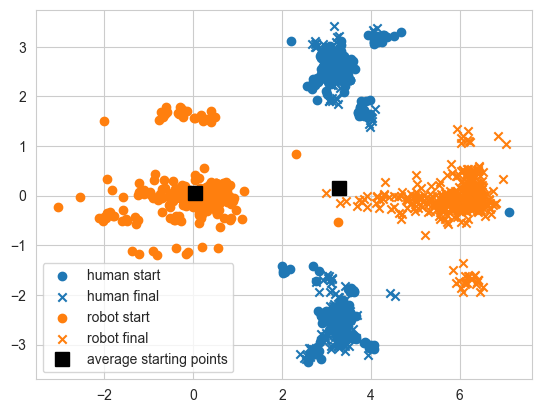

In [62]:
fig, ax = plt.subplots()
ax.scatter(starting_positions.x_human, starting_positions.z_human, color="C0", marker="o", label="human start")
ax.scatter(final_positions.x_human, final_positions.z_human, color="C0", marker="x", label="human final")
ax.scatter(starting_positions.x_spot, starting_positions.z_spot, color="C1", marker="o", label="robot start")
ax.scatter(final_positions.x_spot, final_positions.z_spot, color="C1", marker="x", label="robot final")
ax.plot(mean_positions.x_human, mean_positions.z_human, color="k", ls="", marker="s", ms=10, label="average starting points")
ax.plot(mean_positions.x_spot, mean_positions.z_spot, color="k", marker="s", ms=10)
ax.legend()

Let's assume HCP(Hypothetical crossing point): (x, z) = (3.28, 0). In this transformed coordinate, Spot always start from 
approximately (0, 0).

## Illustrating one crossing trial

In [63]:
trial = df_crossing[(df_crossing.pp_id==1) & (df_crossing.trial==17)]

In [64]:
trial

,x_human,z_human,x_spot,z_spot,time,trial,pp_id,appearance,distance_to_crossing_human,distance_to_crossing_robot
0,3.083396,2.919734,0.527394,0.254232,0.0,17,1,sub,2.880224,2.768112
1,3.087707,2.927833,0.547486,0.255470,0.1,17,1,sub,2.888001,2.748171
2,3.091143,2.934354,0.570356,0.256753,0.2,17,1,sub,2.894272,2.725466
3,3.093706,2.939298,0.596003,0.258081,0.3,17,1,sub,2.899032,2.700000
4,3.095395,2.942664,0.624428,0.259453,0.4,17,1,sub,2.902277,2.671772
...,...,...,...,...,...,...,...,...,...,...
212,3.491367,-2.386353,6.507973,0.233698,21.2,17,1,sub,2.441627,3.225673
213,3.489074,-2.386094,6.506428,0.231998,21.3,17,1,sub,2.441178,3.224032
214,3.486266,-2.385737,6.505023,0.229736,21.4,17,1,sub,2.440592,3.222501
215,3.482943,-2.385282,6.503760,0.226911,21.5,17,1,sub,2.439870,3.221080


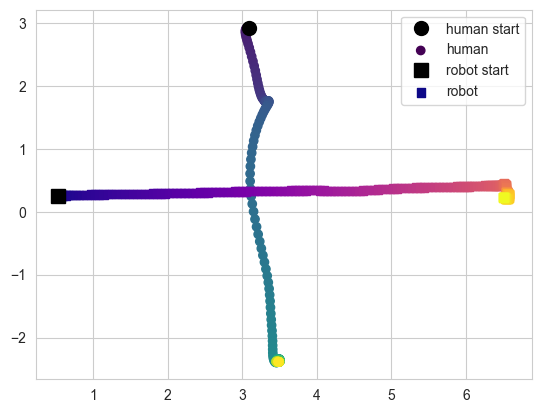

In [65]:
fig, ax = plt.subplots()
ax.plot(trial.x_human[0], trial.z_human[0], color="k", ls="", marker="o", ms=10, label="human start")
ax.scatter(trial.x_human, trial.z_human, c=cm.viridis(trial.time/trial.time.max()), marker="o", label="human")
ax.plot(trial.x_spot[0], trial.z_spot[0], color="k", ls="", marker="s", ms=10, label="robot start")
ax.scatter(trial.x_spot, trial.z_spot, c=cm.plasma(trial.time/trial.time.max()), marker="s", label="robot")
ax.legend()

## Animation

Animations are better saved in a gif file, it's tricky to render them reliably in a Jupyter notebook. Saving does take some time though

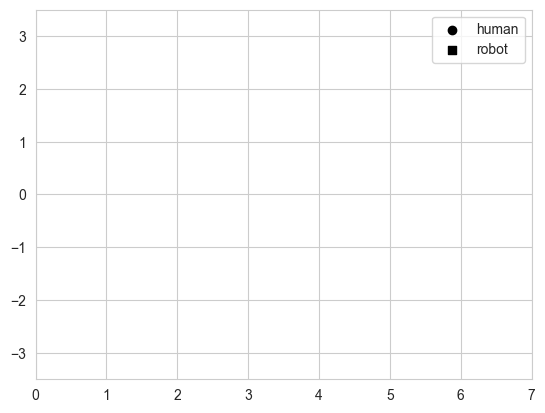

In [51]:
# set dt to 50ms to get 2x speed-up in the animation
# to keep the original speed, set dt to 100 ms
dt = 50 #ms
fig, ax = plt.subplots()

traj_human = ax.scatter(trial.x_human[0], trial.z_human[0], c="k", marker="o", label="human")
traj_robot = ax.scatter(trial.x_spot[0], trial.z_spot[0], c="k", marker="s", label="robot")

ax.set(xlim=[0, 7], ylim=[-3.5, 3.5])
ax.legend()

def update(frame):
    data_human = np.stack([trial.x_human[:frame], trial.z_human[:frame]]).T
    data_robot = np.stack([trial.x_spot[:frame], trial.z_spot[:frame]]).T
    traj_human.set_offsets(data_human)
    traj_robot.set_offsets(data_robot)
    return (traj_human, traj_robot)

ani = animation.FuncAnimation(fig=fig, func=update, frames=len(trial), interval=dt)
ani.save("crossing_trial.gif", writer="pillow", fps=1000/dt)

## Getting the metrics

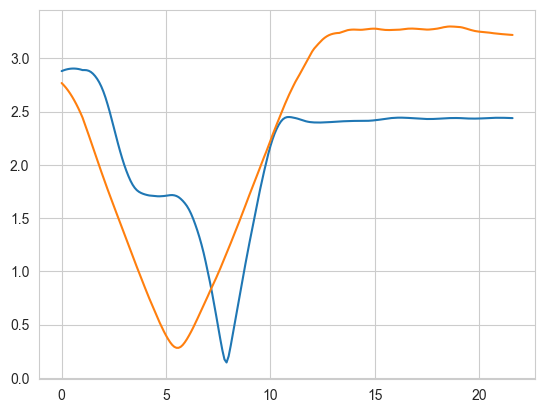

In [66]:
plt.plot(trial.time, trial.distance_to_crossing_human, label="human")
plt.plot(trial.time, trial.distance_to_crossing_robot, label="robot")

In [77]:
def get_t_crossing(traj):
    idx_min_human = traj.distance_to_crossing_human.idxmin()
    idx_min_robot = traj.distance_to_crossing_robot.idxmin()
    return pd.Series({"idx_min_human": idx_min_human,
                      "idx_min_robot": idx_min_robot,
                      "t_crossing_human": traj.iloc[idx_min_human].time, 
                      "t_crossing_robot": traj.iloc[idx_min_robot].time})

crossing_metrics = (df_crossing.groupby(["pp_id", "trial"])
                    .apply(get_t_crossing)
                    .join(df_crossing.groupby(["pp_id", "trial"]).first()["appearance"])
                    .reset_index())

In [79]:
crossing_metrics["is_human_first"] = crossing_metrics["t_crossing_human"] < crossing_metrics["t_crossing_robot"]
crossing_metrics["crossed_first"] = "robot"
crossing_metrics.loc[crossing_metrics.is_human_first, ["crossed_first"]] = "human"

In [80]:
crossing_metrics

,pp_id,trial,idx_min_human,idx_min_robot,t_crossing_human,t_crossing_robot,appearance,is_human_first,crossed_first
0,1,17,79.0,56.0,7.9,5.6,sub,False,robot
1,1,18,37.0,86.0,3.7,8.6,dom,True,human
2,1,19,39.0,66.0,3.9,6.6,dom,True,human
3,1,20,34.0,58.0,3.4,5.8,sub,True,human
4,1,21,75.0,54.0,7.5,5.4,sub,False,robot
...,...,...,...,...,...,...,...,...,...
330,21,28,41.0,75.0,4.1,7.5,sub,True,human
331,21,29,43.0,76.0,4.3,7.6,dom,True,human
332,21,30,40.0,80.0,4.0,8.0,sub,True,human
333,21,31,41.0,73.0,4.1,7.3,sub,True,human


## Who crossed first?

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

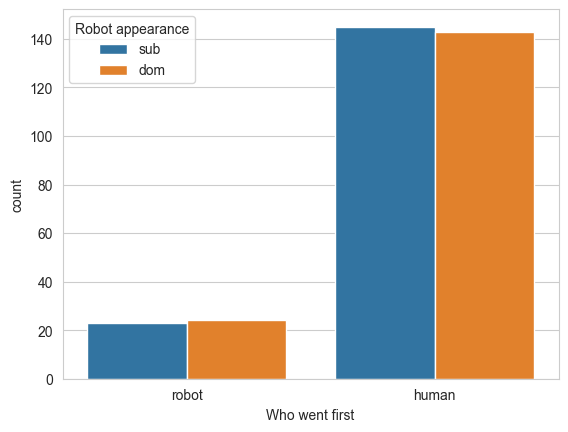

In [97]:
fig, ax = plt.subplots()
g = sns.countplot(data=crossing_metrics, x="crossed_first", hue="appearance", ax=ax)
ax.set_xlabel("Who went first")
g.legend().set_title("Robot appearance")
# g.legend.set_title("TTA")

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0, 0.5, '% human went first')

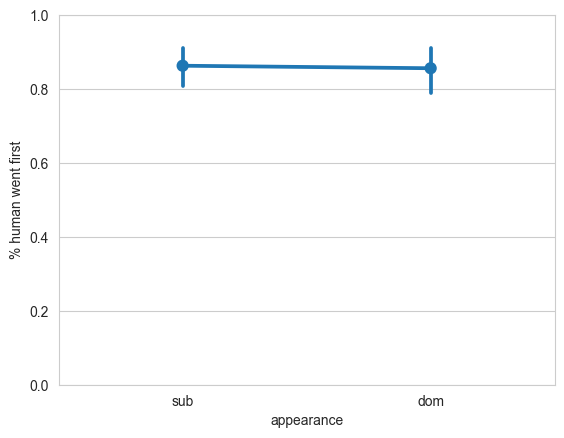

In [90]:
fig, ax = plt.subplots()
sns.pointplot(data=crossing_metrics, y="is_human_first", x="appearance", ax=ax)
ax.set_ylim((0,1))
ax.set_ylabel("% human went first")

# Trajectories
### Note: Coordinate of participants 11~13 is not aligned to the axis :( I am still figuring out why. 

In [31]:
def get_trajectory_df(pp_ids, apparance, position_of, scenario):
    
    df_plot= None
    
    #Iterate over participants
    for pp_id in pp_ids:
        path = './traj_data/id_' + pp_id + '/' + position_of
       # path_Spot = './traj_data/id_' + pp_id + '/Spot'

        trials = helper.get_trial_list(scenario, apparance)
        
        # Add each trial to one dataframe
        for i in trials[int(pp_id)-1]:
            df = pd.read_csv(path + "/" + pp_id + "_"+ str(i) + ".csv")
            
            # Add some columns that can be useful later 
            df['trial'] = str(i)
            df['pp_id'] = pp_id
            # print(df['z'])
            df['z'] = df['z'] - df.loc[0]['z'] # To adjust noise in the start 
            
            df_plot = pd.concat([df_plot, df.loc[:200]], axis = 0)
            
    return df_plot

<Axes: xlabel='x', ylabel='z'>

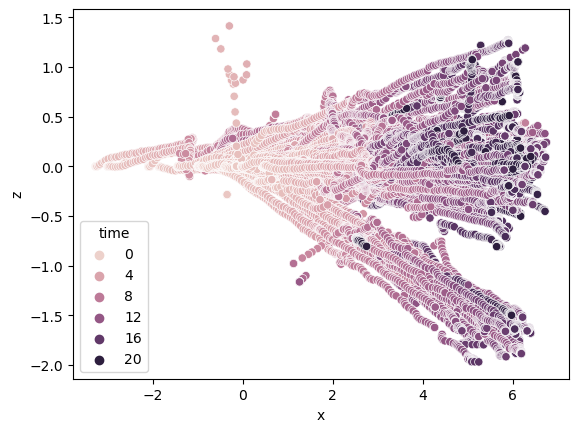

In [32]:
## First, plot all the trajectory points for Spot (dominant)

df_traj_Spot = get_trajectory_df(pp_ids = ["%02d" % x for x in range(1, 22)], apparance = 'dom', position_of = 'Spot', scenario = 'fronting');
sns.scatterplot(data = df_traj_Spot.loc[: , ['x', 'z', 'time']], x = 'x', y = 'z', hue = 'time')

<Axes: xlabel='x', ylabel='z'>

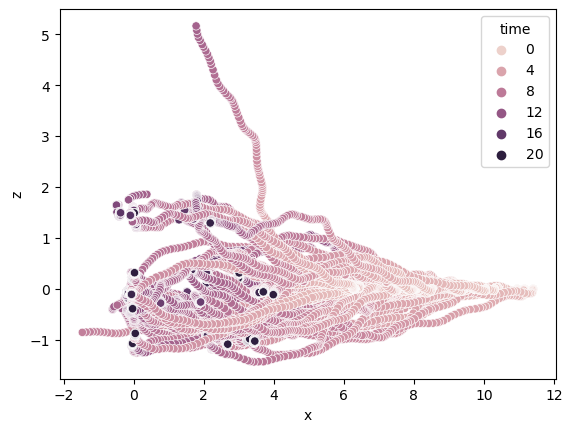

In [33]:
# Human, dominant
df_traj_Human = get_trajectory_df(pp_ids =  ["%02d" % x for x in range(1, 12)], apparance = 'dom', position_of = 'Human', scenario = 'fronting');
sns.scatterplot(data = df_traj_Human.loc[: , ['x', 'z', 'time']], x = 'x', y = 'z', hue = 'time' )

In [34]:
#sns.lineplot(data = df_traj_Human.loc[:, ['x', 'z','time']], x = 'x', y = 'z')
# Line plot is ugly here

C:\Users\nanap\AppData\Local\Temp\ipykernel_1840\2388284595.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_traj_Spot_pp = df_traj_Spot.groupby(['pp_id']).mean()


<Axes: xlabel='x', ylabel='z'>

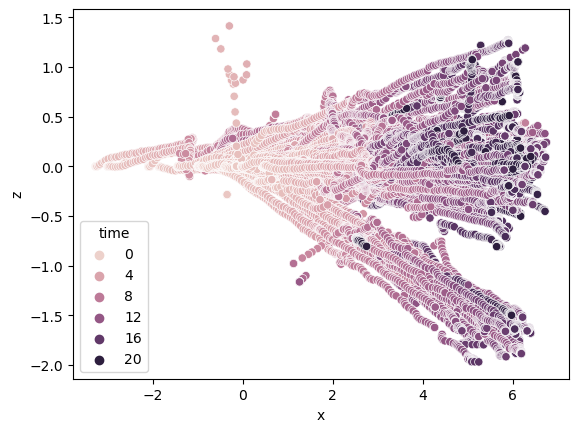

In [35]:
# Next idea
# Groupby participants -> draw 21 trajectories??
# (This part is not done.)

df_traj_Spot_pp = df_traj_Spot.groupby(['pp_id']).mean()
sns.scatterplot(data = df_traj_Spot.loc[: , ['x', 'z', 'time']], x = 'x', y = 'z', hue = 'time')